# This is the code we used to obtain results for the portfolios

### This focuses on the results obtained from a data set looking at percentil subsections of varius trading variables, it also looks at the williams index and stock data such as bid ask trading and volume.
### we think this will have benifit because it will include index data and market data

In [1]:
import pandas as pd

In [2]:
# Read in the data
r = pd.read_csv('dataIneed2.csv')

In [3]:
r

,Unnamed: 0,real,predict
0,0,265.339996,245.11331
1,1,266.000000,244.66884
2,2,269.589996,245.44400
3,3,273.029999,246.48482
4,4,273.109985,247.58762
...,...,...,...
720,720,367.859985,343.27830
721,721,367.239990,342.45142
722,722,367.570007,342.10013
723,723,369.000000,342.32523


In [4]:
# Running a regression to look in to the amount of variability that can be explained by this model

# > 90% R^2 is a good outcome

from statsmodels.formula.api import ols
model = ols('predict ~ real', r).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                predict   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8116.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:41:46   Log-Likelihood:                -2565.6
No. Observations:                 725   AIC:                             5135.
Df Residuals:                     723   BIC:                             5144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1455      3.219     -1.598      0.1

In [5]:
r = r.rename(columns = {'Unnamed: 0':'Trading Day'})

In [6]:
r

,Trading Day,real,predict
0,0,265.339996,245.11331
1,1,266.000000,244.66884
2,2,269.589996,245.44400
3,3,273.029999,246.48482
4,4,273.109985,247.58762
...,...,...,...
720,720,367.859985,343.27830
721,721,367.239990,342.45142
722,722,367.570007,342.10013
723,723,369.000000,342.32523


### Creating columns for the implied returns based on the predicted prices. Then we get weather we predict weather the price goes up or down and which way it actually went.

In [7]:
r['real returns'] = r['real'].pct_change()
r['predicted returns'] = r['predict'].pct_change()

In [8]:
r['realdirection'] = r['real returns'] >= 0
r['predicteddirection'] = r['predicted returns'] >= 0

In [9]:
(r[r['realdirection'] == r['predicteddirection']])

,Trading Day,real,predict,real returns,predicted returns,realdirection,predicteddirection
0,0,265.339996,245.11331,NaN,NaN,False,False
2,2,269.589996,245.44400,0.013496,0.003168,True,True
3,3,273.029999,246.48482,0.012760,0.004241,True,True
4,4,273.109985,247.58762,0.000293,0.004474,True,True
9,9,277.899994,248.89084,0.011612,0.001325,True,True
...,...,...,...,...,...,...,...
718,718,372.239990,343.60992,0.005592,0.000304,True,True
720,720,367.859985,343.27830,-0.003576,-0.002216,False,False
721,721,367.239990,342.45142,-0.001685,-0.002409,False,False
723,723,369.000000,342.32523,0.003890,0.000658,True,True


In [10]:
# Changing True False to binary

r['realdirection'] = r['realdirection'] * 1
r['predicteddirection'] = r['predicteddirection'] * 1

In [11]:
r['portfolio'] = r['real returns'] * r['predicteddirection']

In [12]:
r = r.dropna()

### This graph shows the decrease in volitility in the portoflio reutrns and the real returns

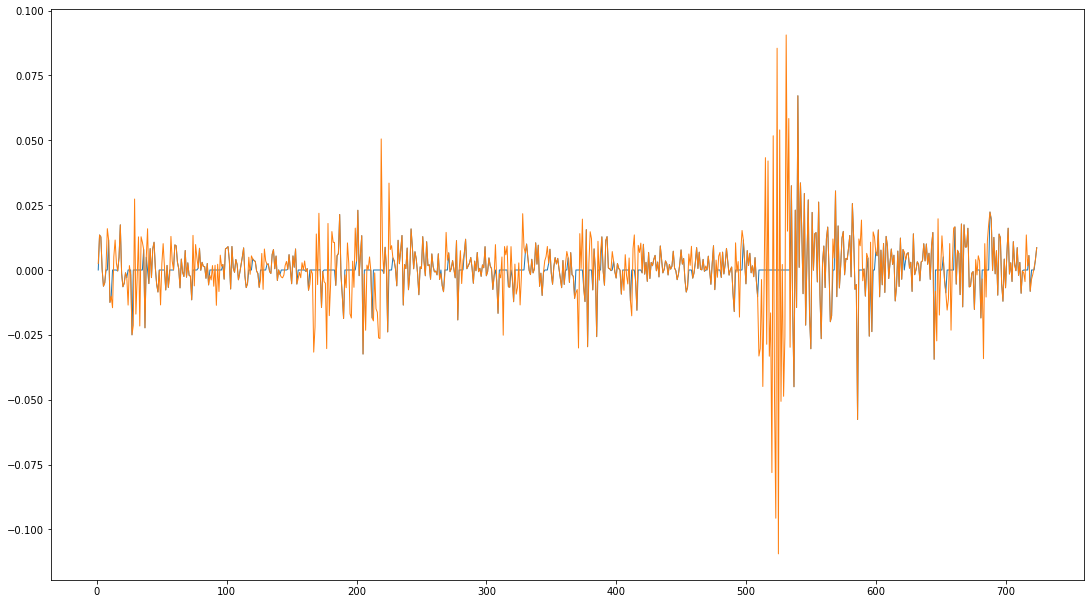

In [13]:
import matplotlib.pyplot as plt
x = r['Trading Day']
y = r[['portfolio','real returns']]
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=1.0)
fig.set_size_inches(18.5, 10.5)
plt.show()

### Calculationg sharpe ratios

In [14]:
print('sharpe for the portfolio', (r['portfolio'].mean()/r['portfolio'].std()) * (252 ** (1/2)))
print('Sharpe for the market', (r['real returns'].mean()/r['real returns'].std()) * (252 ** (1/2)))

sharpe for the portfolio 1.0851134870236936
Sharpe for the market 0.6274563590919796


### Estimating returns on the two portfolios

In [15]:
market = []
x = 100
for i in list(r['real returns'] + 1):
    x = x * i
    market.append(x)
print('returns for $100 in the market: ', x )

portfolio = []
x = 100
for i in list(r['portfolio'] + 1):
    x = x * i
    portfolio.append(x)
print('returns for $100 in the portfolio: ', x )

returns for $100 in the market:  140.2615582137126
returns for $100 in the portfolio:  147.82366276760266


In [16]:
g = pd.DataFrame()
g['portfolio'] = portfolio
g['market'] = market

## Plot of the two portfolios preformance.

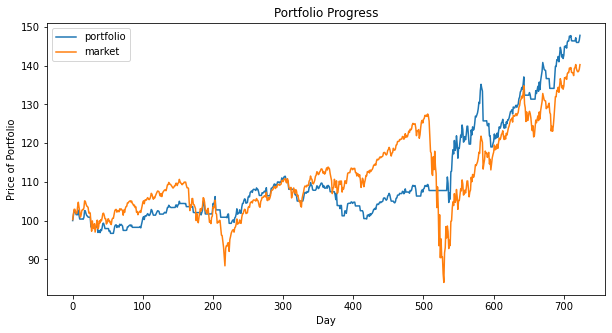

In [17]:
g.plot(figsize= (10,5))
plt.legend(loc = 'best')
plt.title("Portfolio Progress")
plt.xlabel("Day")
plt.ylabel("Price of Portfolio")
plt.show()